<a href="https://colab.research.google.com/github/AngleKit/MSE7530Codes/blob/main/Assignments/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
import scipy.ndimage as ndi
import cv2

# Assignment 6 - MSE 7530
The goal of this assignment is to use some of your image processing principles to solve realistic materials science problems.  
**Scoring**: Grade for 7530 is taken out of 100 points; 5995 grade is taken out of 125 points

### <font color='red'>Important AI Notice for this assignment:
In this assignment, you may **not** use generative AI on Question 1. Question 2 requires you to use it. For questions 3 and 4, you may use it as much as you want. However, if you use it, you must clearly indicate how and where you used it, including what prompts you gave it and how you evaluated whether the results made sense. You **are responsible** for understanding how the code ultimately works; it will also be graded for correctness, so if it did something wrong and you let it slide, you are still on the hook. You are welcome to complete questions 3 and 4 without generative AI if you wish. If you use generative AI for anything other than question 2, you **must** include a reflection paragraph at the end about what tasks it was most helpful for, and what its limitations were.

## Intro and Principles
To make the homework questions a bit easier, I am going to provide some examples of every principle that **I** used to solve the questions. Note that there are many approaches to these problems. You may use any approaches that we have learned in class without citation. **If you use an approach that we did not cover in class, you must cite the source you used**. A simple URL is fine; no need for a formal citation.

Most likely, the 3 most helpful packages you may use are scikit-image, scipy.ndimage, and/or openCV (cv2). Any approaches that you find will probably use these packages.

<font size=5><font color='blue'> **Please Note**: <font color='black'>for most of my demo, I use the colormap 'Grays_r', which displays 1s as white and 0s as black. I changed this from what I was originally using ('Grays') as it seemed more intuitive; I attempted to change them all back to 'Grays_r', but it is possible I missed one or two. If all of a sudden it seems like something switched to inverse, that could be why.  You are welcome to use any spatially uniform colormap you like; please plot the colorbar on any plot you show.

## Concept: Edge detection  
Note that the example as given would not get you very far, and you would want to combine these principles with other operations for clear quantitative information.

Recall that an edge can be detected by using first and second derivatives. For example, I have an image of a thin film I tried to coat, but it didn't evenly cover the surface. I can compute the gradient to find edges:

In [3]:
!rm -r MSE7530
! git clone https://github.com/cbishop4/MSE7530/

rm: cannot remove 'MSE7530': No such file or directory
Cloning into 'MSE7530'...
remote: Enumerating objects: 462, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (289/289), done.
remote: Total 462 (delta 92), reused 4 (delta 4), pack-reused 165 (from 1)
Receiving objects: 100% (462/462), 74.92 MiB | 24.87 MiB/s, done.
Resolving deltas: 100% (153/153), done.


In [4]:
film = ski.io.imread('MSE7530/sampledata/HW6/CEB2_s1_4x_1.jpg')
film.shape

(1200, 1600, 3)

Note that this image has 3 channels (i.e., it is composed of 3 separate 1200x1600 pixel images). This is because it is an RGB image. We didn't learn this in class, but to turn an RGB image to grayscale, the operation is:  
$Gray~=~0.2989Red + 0.5870Green + 0.1140Blue$

There are specific functions (RGBtoGray) that automatically do this, but here for the sake of illustration we will manually do it.

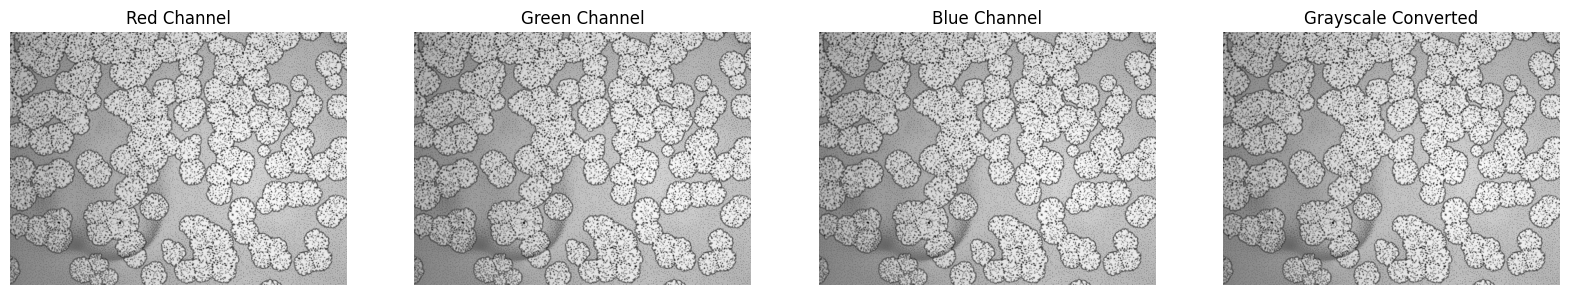

In [5]:
red = film[:,:,0]; green = film[:,:,1]; blue = film[:,:,2]
gray = 0.2989 * red + 0.5870 * green + 0.1140 * blue
fig, ax = plt.subplots(1,4,figsize=(20,4))
ax[0].imshow(red,cmap='Grays_r'); ax[1].imshow(green,cmap='Grays_r'); ax[2].imshow(blue,cmap='Grays_r')
ax[3].imshow(gray,cmap='Grays_r')
ax[0].set_title('Red Channel'); ax[1].set_title('Green Channel'); ax[2].set_title('Blue Channel')
ax[3].set_title('Grayscale Converted')
for a in ax:
  a.axis('off')

To detect edges, we can use the 2D gradient:

In [5]:
gray.shape

(1200, 1600)

Text(0.5, 0.98, 'np.gradient (2nd derivative) 2D result')

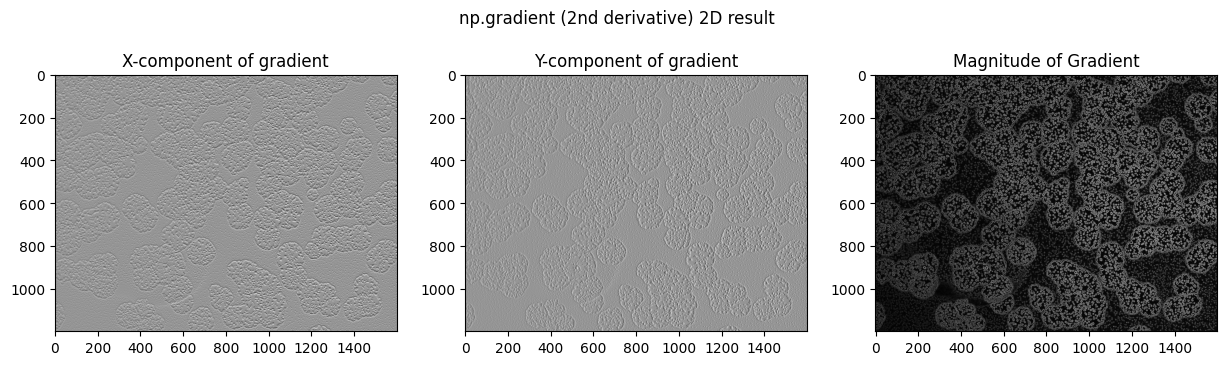

In [6]:
gradient = np.gradient(gray)
fig, ax = plt.subplots(1,3,figsize=(15,4))
ax[0].imshow(gradient[0],cmap='Grays_r')
ax[1].imshow(gradient[1],cmap='Grays_r')
ax[2].imshow(np.sqrt(gradient[0]**2 + gradient[1]**2),cmap='Grays_r')
ax[0].set_title('X-component of gradient'); ax[1].set_title('Y-component of gradient'); ax[2].set_title('Magnitude of Gradient')
plt.suptitle('np.gradient (2nd derivative) 2D result')

You can take a linecut of an image to see the intensity values as you move across a specified axis. To do this, you index all (:) of one axis, and a single index of the other. For example, (note that the linecut has been shifted by a constant in intensity to clearly see both)

Text(0.5, 1.0, 'Gradient Magnitude')

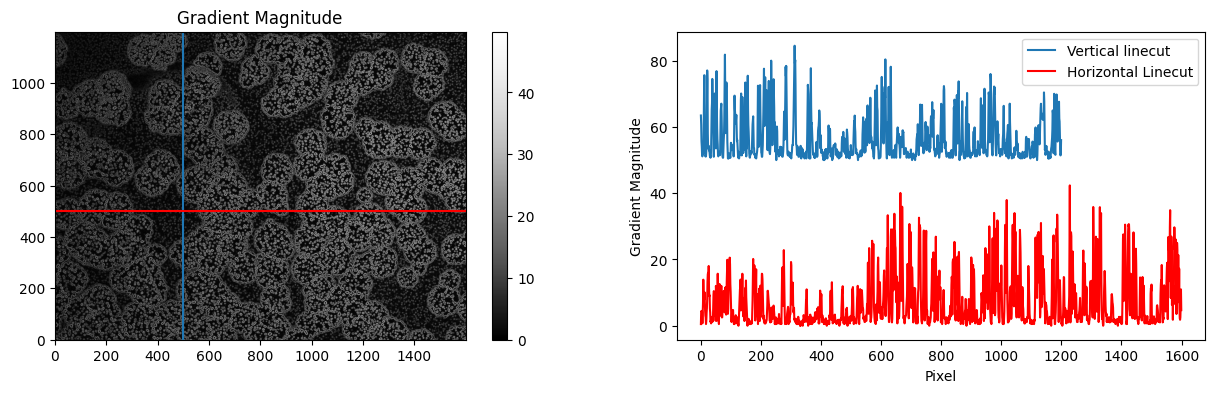

In [7]:
mag = np.sqrt(gradient[0]**2 + gradient[1]**2)
fig, ax = plt.subplots(1,2,figsize=(15,4))
cb = ax[0].imshow(mag, origin='lower',cmap='Grays_r')
plt.colorbar(cb,ax=ax[0])
ax[0].axvline(500,color='tab:blue')
ax[1].plot(mag[:,500]+50,color='tab:blue',label='Vertical linecut')
ax[0].axhline(500, color='red')
ax[1].plot(mag[500,:],color='red',label='Horizontal Linecut')
ax[1].legend()
ax[1].set_xlabel('Pixel'); ax[1].set_ylabel('Gradient Magnitude')
ax[0].set_title('Gradient Magnitude')

Alternatively, you can take the linecut right at the beginning and then calculate the 1st and 2nd derivative:

Text(0, 0.5, 'd2I/dpx2')

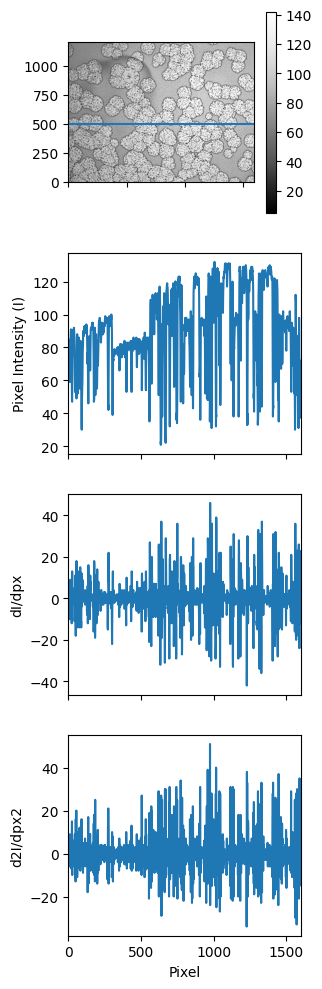

In [8]:
fig, ax = plt.subplots(4,1,figsize=(3,12),sharex=True) # plotted with a common x-axis
cb = ax[0].imshow(gray,origin='lower',cmap='Grays_r')
plt.colorbar(cb, ax=ax[0])
ax[0].axhline(500)
lcut = gray[500,:]
ax[1].plot(lcut)
d1 = np.diff(lcut)
ax[2].plot(d1)
d2 = np.diff(d1)
ax[3].plot(d2)
ax[3].set_xlabel('Pixel')
ax[1].set_ylabel('Pixel Intensity (I)')
ax[2].set_ylabel('dI/dpx')
ax[3].set_ylabel('d2I/dpx2')

As you can see, these are not very smooth, and would benefit from some pre-processing; you could pre-process the initial image with a smoothing filter, or you could take the linecut and smooth it using Savitzky-Golay or another method, as we did earlier in the class.

## Concept: Binary morphological operators & example of image walkthrough
The way I do an image walkthrough here is roughly how you will want to do it in Question #1.

Let's say we want to determine the surface coverage of the film. To explain, let's take a zoomed-in look where I explain what you're looking at.

Text(50, 250, 'B')

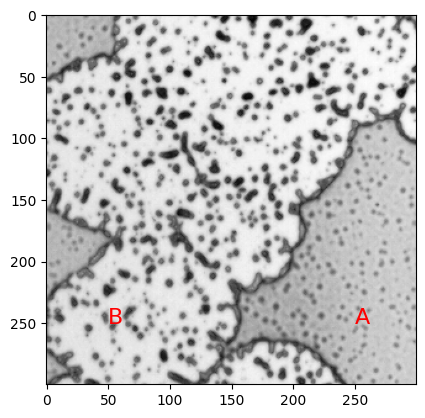

In [9]:
plt.imshow(gray[500:800,500:800],cmap='Grays_r')
plt.text(250, 250,'A',fontsize=16, color='red')
plt.text(50, 250,'B',fontsize=16, color='red')

The above image is a failed attempt at making a smooth continuous film. The region labeled "A" is an area where the film covered; the "B" region is where it didn't stick. The white dots in the B region are small beads of liquid on the surface; in the A region they are probably air bubbles, but will count as part of the continuously covered film.

#### My Goal is to use image processing functions to determine what percentage of the surface is covered by thin film.  
I will use various image processing functions; some have not been covered in class. You **will** want to use Google when you do this; anything you find online is fair game.

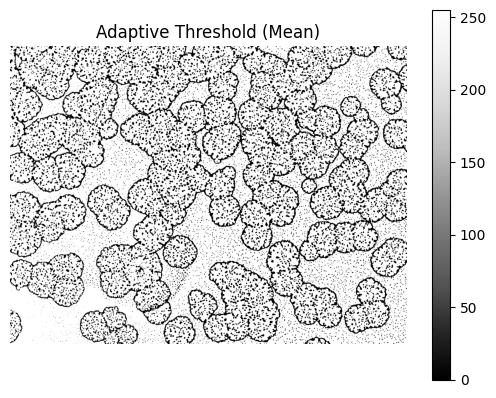

In [10]:
# Convert the grayscale image to 8-bit unsigned integer format; necessary for opencv
gray_8u = cv2.convertScaleAbs(gray)

thresh_gauss = cv2.adaptiveThreshold(gray_8u, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 15)

plt.imshow(thresh_gauss, cmap='Grays_r')
plt.title('Adaptive Threshold (Mean)')
plt.axis('off'); plt.colorbar()
plt.show()

Above, I used an adaptive threshold to "even out" the image. The adaptive threshold was needed because the image had uneven illumination and some smudges; the adaptive filter uses local means rather than a mean over the entire image.

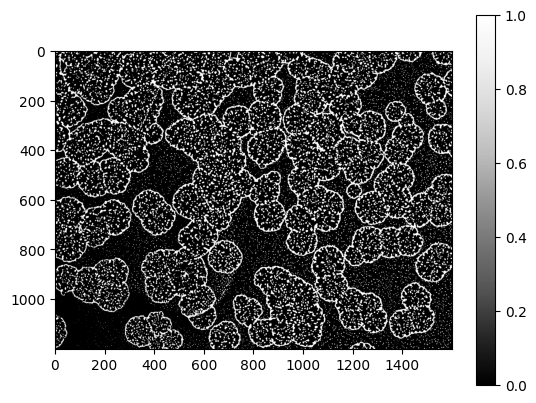

In [11]:
bined = thresh_gauss < 100
plt.imshow(bined,cmap='Grays_r')
plt.colorbar()

Here, I picked a binary threshold where the edges, raised droplets, and film defects are white (1s), while the continuous film is mostly black (0s). Since the white areas in the continuous film are very small, I figured it would be easy to erode away those small features while keeping the ones inside the uncoated areas.

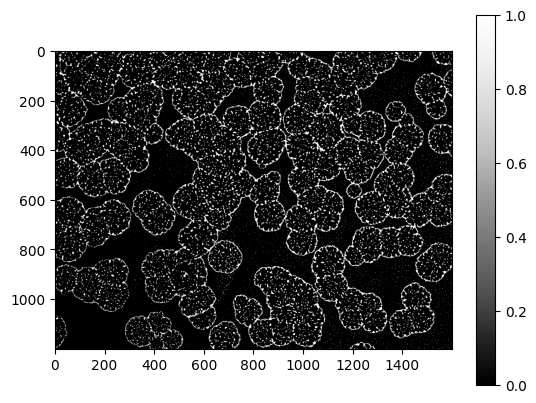

In [12]:
# erode this
from skimage.morphology import binary_erosion as er

eroded = er(bined,footprint=ski.morphology.disk(1))
plt.imshow(eroded,cmap='Grays_r')
plt.colorbar()


To get rid of the white spots within the continuous film area, I eroded the binary image. I used the skimage morphology disk to create my structuring element, which I print out below.

In [13]:
print(ski.morphology.disk(1))

[[0 1 0]
 [1 1 1]
 [0 1 0]]


Other options for structuring elements include arrays of ones (np.ones((3,3))) will create a structuring element that is a 3x3 pixel array of ones; see here (https://scikit-image.org/docs/0.25.x/auto_examples/numpy_operations/plot_structuring_elements.html#sphx-glr-auto-examples-numpy-operations-plot-structuring-elements-py) for different structuring elements (footprints) you can make.

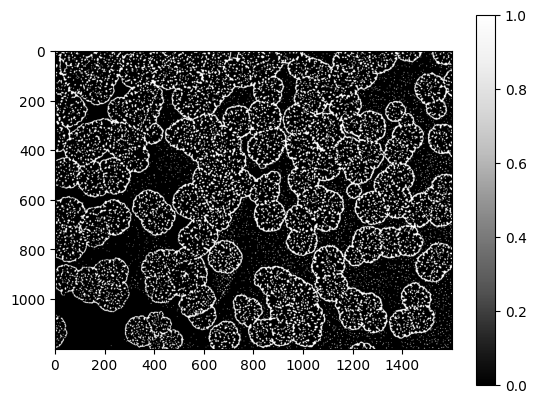

In [14]:
from skimage.morphology import binary_dilation as dil
dilated = dil(eroded,footprint=ski.morphology.disk(1))
plt.imshow(dilated,cmap='Grays_r')
plt.colorbar()

Dilated the eroded image to see if I erased the holes; while I erased some of the largest ones, others remained. I will try another function to remove small objects next, that I found in the skimage.morphology documentation.

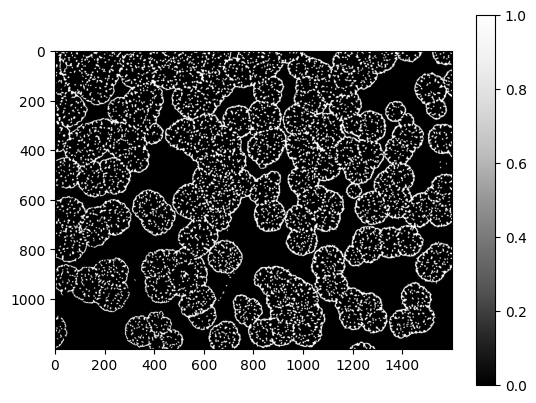

In [15]:
from skimage.morphology import remove_small_objects as rem_objects
removed1 = rem_objects(dilated,min_size=20)
plt.imshow(removed1,cmap='Grays_r')
plt.colorbar()

That did a much better job, and left behind the small objects in the uncoated areas so that we can differentiate between areas.

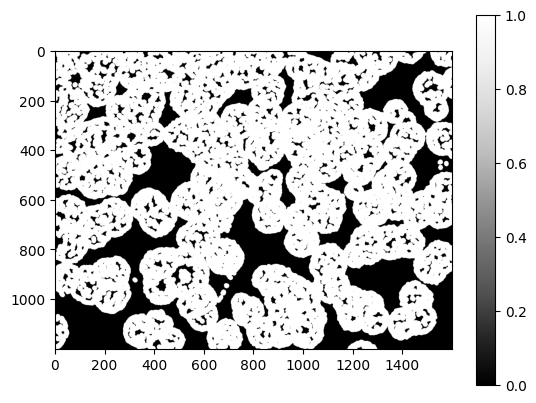

In [16]:
redilate = dil(removed1,footprint=ski.morphology.disk(8))
plt.imshow(redilate,cmap='Grays_r')
plt.colorbar()

Here I dilated it to fill some of those gaps and make my domains whiter. Here introduced a source of error, because some of them dilated through continuous film.

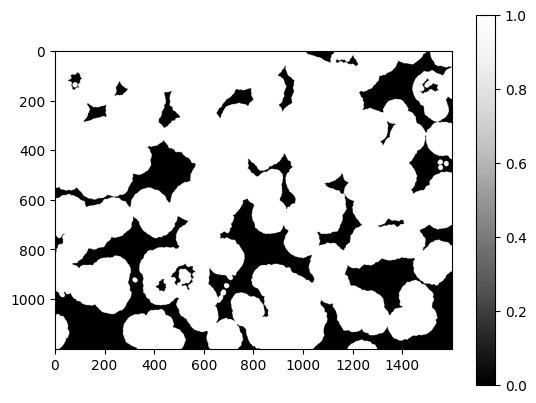

In [17]:
from skimage.morphology import remove_small_holes as rem_holes
removed2 = rem_holes(redilate,area_threshold=1000)
plt.imshow(removed2, cmap='Grays_r')
plt.colorbar()

Now almost all of the small holes can be removed. The area threshold had to be chosen so that real continuous film sections didn't get fully filled, which did leave behind a few spots that should have been closed. This is another source of error.

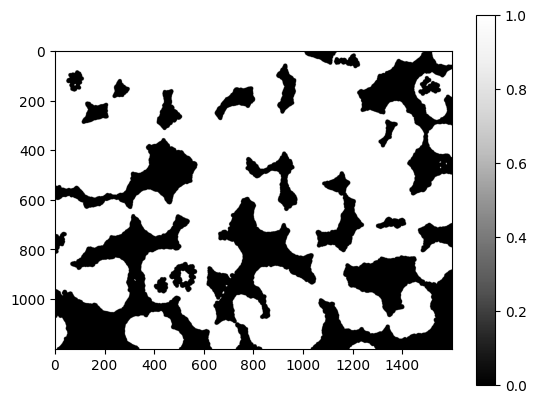

In [18]:
reerode = er(removed2,footprint=ski.morphology.disk(8))
plt.imshow(reerode,cmap='Grays_r')
plt.colorbar()

In the last step, I eroded it back by the same amount I originally dilated it so that the domains stayed the same size as they began.

<font size=6><font color='blue'> Final check: Mandatory for your Question 1.  
Here we check our final answer for a filter against our original image. One filter should mostly show the dewet areas, while the other filter should mostly show continuous film.

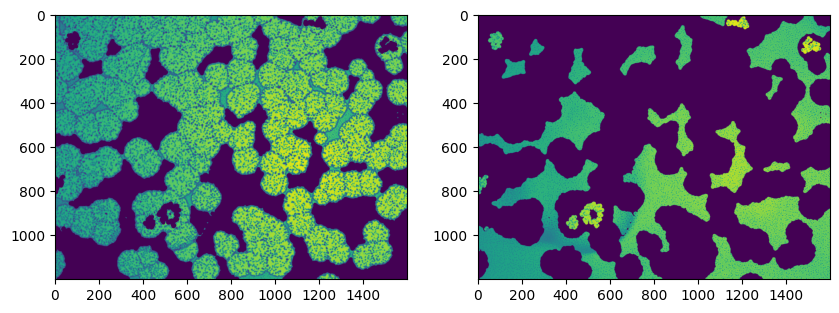

In [19]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(reerode*gray)
ax[1].imshow((1-reerode)*gray)

**Final point**: I have decided that this is good enough. There are a few areas that have been filled in; this could definitely be improved. However, it seems to be reasonable.

### Class review: Image Math

Images can be added, subtracted, multiplied, divided, summed, etc. When you do this with numpy, it operates element-wise.

# Homework Questions

##<font color='blue'> 1. Threshold this image to make all crystals appear white (1s), and all other areas appear black (0s). (**30 points +5 EC**)


Image is at the course Github, and is pulled from https://doi.org/10.5958/0974-4150.2018.00120.7. It is located in the sampledata/HW6/ folder, and is titled "NeedleCrystals.png".

###<font color='blue'> A. Use a series of Image processing steps and explain the rationale for each along the way. 20/20 points for a complete walk-through with reasonable steps, even if you don't get it perfect; +5 EC for using an algorithm to count the separate particles automatically (this would require extending what we did in class). A complete walkthrough entails showing the step and plotting the result at each step, with a following "text" box explaining what you did, why, and how it modified the image (qualitatively). See above walkthrough for an example. Finally, you must end with a final check of your filter against your original image, as shown in the walkthrough.

Please use a combination of code and text cells to answer this question

Text(0.5, 1.0, 'Grayscale Converted')

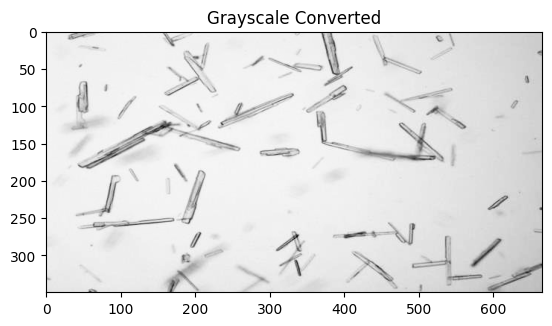

In [39]:
# My Goal is to use image processing functions to make all crystals appear white with all other areas black
needle= ski.io.imread('MSE7530/sampledata/HW6/NeedleCrystals.png') # Load Image
needle.shape # Check size/shape of image

#Change image into gray scale?
red = needle[:,:,0]; green = needle[:,:,1]; blue = needle[:,:,2]
grayN = 0.2989 * red + 0.5870 * green + 0.1140 * blue

#Plot image using light gray view
plt.imshow(grayN,cmap='Grays_r')
plt.title('Grayscale Converted')

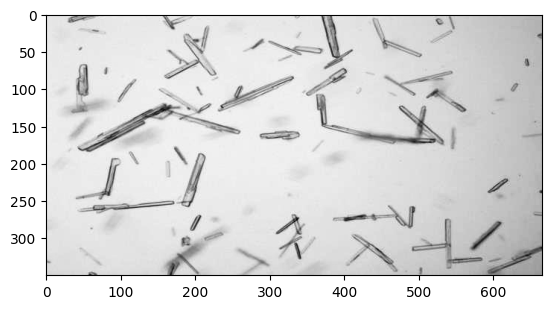

In [72]:
grayNN = grayN*grayN
plt.imshow(grayNN, cmap='Grays_r')

I Tried to highten the image, but all tempts caused the processed image to be blank so, I just used the ogrinal image

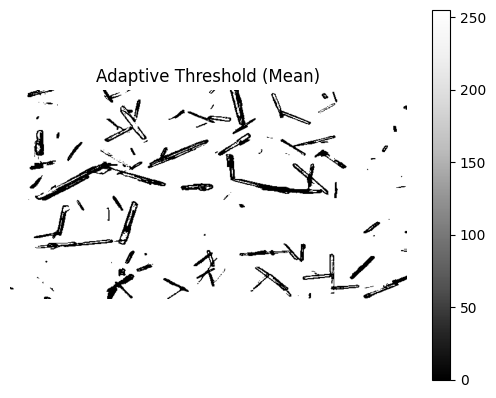

In [74]:
# Convert the grayscale image to 8-bit unsigned integer format; (necessary for opencv)
gray_8u = cv2.convertScaleAbs(grayN)

thresh_gauss = cv2.adaptiveThreshold(gray_8u, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 15)


plt.imshow(thresh_gauss, cmap='Grays_r')
plt.title('Adaptive Threshold (Mean)')
plt.axis('off'); plt.colorbar()
plt.show()

Like in the example, first I imported the image in grayscale and then even out the grayscale image using thresh gaussian so that the image only captures the needles and the plain background.

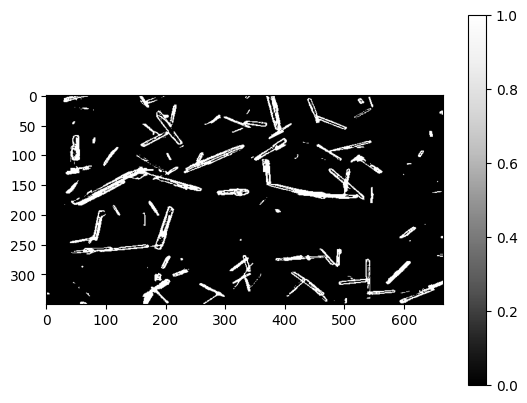

In [41]:
bined = thresh_gauss < 10
plt.imshow(bined,cmap='Grays_r')
plt.colorbar()

Next I added a binary threshold for the needle edges and express  the show the needles in white with the background black.

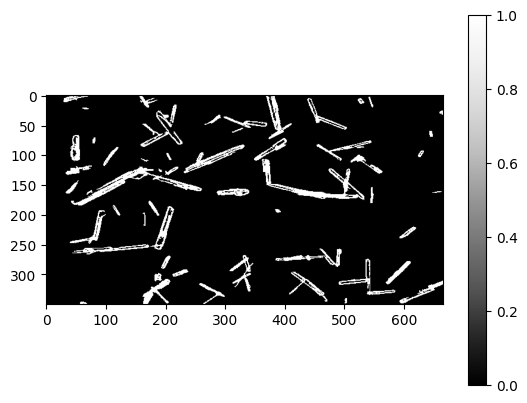

In [42]:
from skimage.morphology import remove_small_objects as rem_objects
removedSpots = rem_objects(bined,min_size=20)
plt.imshow(removedSpots,cmap='Grays_r')
plt.colorbar()

Next I used removed small objects to remove the spoting  within the background of the images to just highlight the needling cystrals

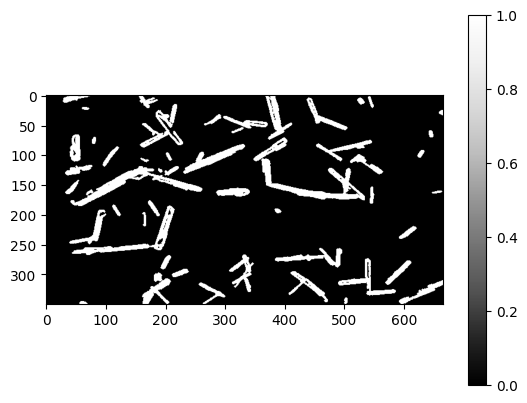

In [43]:
redilateN = dil(removedSpots,footprint=ski.morphology.disk(1))
plt.imshow(redilateN,cmap='Grays_r')
plt.colorbar()

Next I thicken the edges used spot removed to remove the inner openning between within the needle spaces

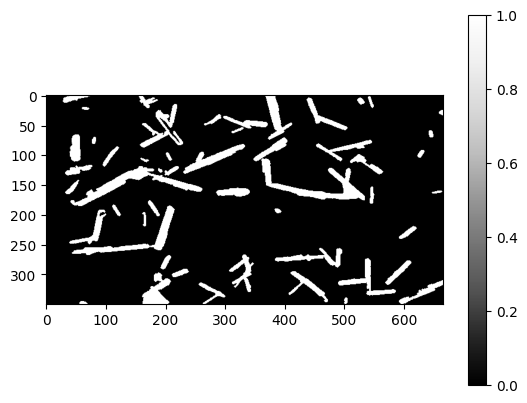

In [44]:
from skimage.morphology import remove_small_holes as rem_holes
removed2N = rem_holes(redilateN,area_threshold=1000)
plt.imshow(removed2N, cmap='Grays_r')
plt.colorbar()

Final I use remove small holes again to completely fill in the spaces of the needles and then invert color view

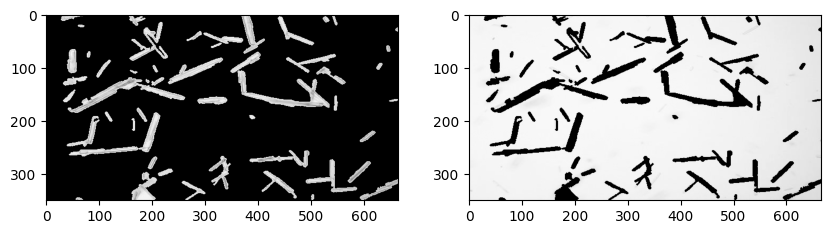

In [49]:
# Change so color are black for needles and white for background
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(removed2N*grayN, cmap='Grays_r')
ax[1].imshow((1-removed2N)*grayN, cmap='Grays_r')


In [ ]:
Finally I processed

51


/tmp/ipython-input-2624392245.py:4: DeprecationWarning: Please import `label` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  labelarray, particle_count = ndimage.measurements.label(removed2N)


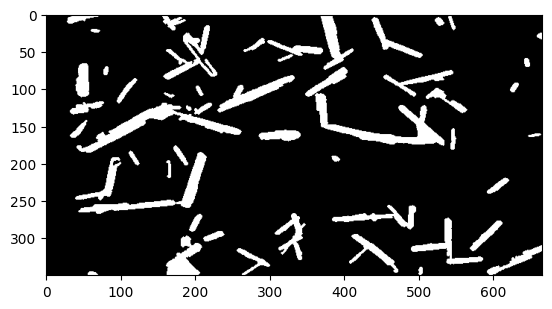

In [56]:
import pylab
from scipy import ndimage

labelarray, particle_count = ndimage.measurements.label(removed2N)
print(particle_count)
pylab.imshow(removed2N, cmap='Grays_r')
pylab.show()

In [59]:
!pip install pims trackpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pims: filename=PIMS-0.7-py3-none-any.whl size=84590 sha256=58e7395d4016cfab89fcfc0a8798b5a21be8e485fc6d71dc2b4b968f72a47888
  Stored in directory: /root/.cache/pip/wheels/be/9c/72/7cb84823aaa980c2e44064caae0ba869239270fac14f7129aa
  Created wheel for trackpy: filename=trackpy-0.7-py3-none-any.whl size=130480 sha256=27c861dc95f81ce06b8d7e6e955aa531006d4b0aef16b1ba76bbc4cffd86429b
  Stored in directory: /root/.cache/pip/wheels/35/97/08/ded65bf12054e510a946f888e0bbaf9d698e449eb365791b94
Successfully built pims trackpy


59


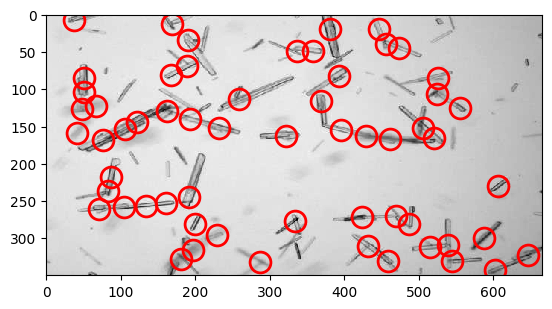

In [68]:
# counting particals using Trackerpy - Following this video (https://www.youtube.com/watch?v=yh_nRTkh9xo&t=1170s)
import pims
import trackpy as tp
import pandas as pd

findneedles = tp.locate(removed2N, diameter=15, minmass=100, invert=False)

# 3. Count the particles
particle_count_tp = len(findneedles)
print(particle_count_tp)

plt.figure()
tp.annotate(findneedles, grayN)
plt.show()

This method was not effective for the needles

### <font color='blue'> B. Identify the step that seemed to introduce the largest amount of error. What about the step made it difficult to avoid that error? (5 points)

The steps the introduced the most error were when I used small spot remove. I believe this was dud to how thin some areas were that they were seen as small spots (shown in image 1). this resulted in holes in some holes in the final version. There were also some areas where the the selection was filled in ( shown in the 2nd image) where needles that were too close to one another was closed off, which introduced a large

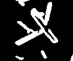
(Image one)

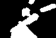
(Image two)

### <font color='blue'> C. Evaluate the advantages to including a jupyter notebook with a publication.  (5 points)
Let's say that the publication quantifies the average crystal size and reports these numbers in the main paper. What possible benefits would there be to the scientific community by adding in a Jupyter notebook in the SI?

If this were the case then, those reviewing the data could possibly graph and continue to evaulate the date and review it based on thier own data. Put the data with in a jupyter notebook could also allow the publishing team to more clearly present thier evaulation methods of the crystal size averaging and openning it to the community to potentinal improve thier final results.

## <font color='blue'>2. **You must do this problem after you do problem #1**; I can't check this so it is on your honor.  
<font color='blue'><font size=5> Use Gemini's "generate code" feature, ChatGPT, or a similar generative AI feature to complete the task asked of you in number 1. Show the result, and include the code it used to complete the task. (**10 points**)

In [33]:
# please use a combination of code and text cells to answer this question
# Prompt entered: can you Use a series of Image processing steps and explain the rationale for each along the way take to "NeedleCrystals.png"
# is to use image processing functions to make all crystals appear white with all other areas black

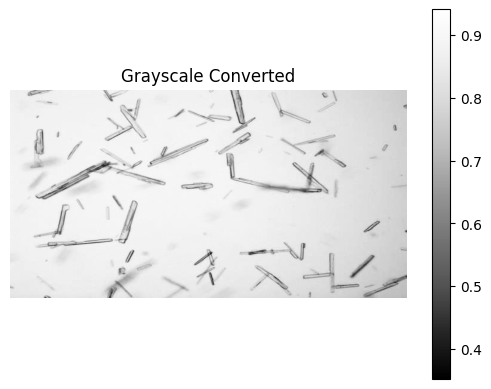

In [75]:
# My Goal is to use image processing functions to make all crystals appear white with all other areas black
needle = ski.io.imread('MSE7530/sampledata/HW6/NeedleCrystals.png') # Load Image
needle.shape # Check size/shape of image

#Change image into gray scale?
grayN = ski.color.rgb2gray(needle)

#Plot image using light gray view
plt.imshow(grayN,cmap='Grays_r')
plt.title('Grayscale Converted')
plt.axis('off')
plt.colorbar()
plt.show()

**Gemini:**First, I loaded the image and converted it to grayscale. This is a common initial step for many image processing tasks, as it reduces the image to a single channel representing intensity.

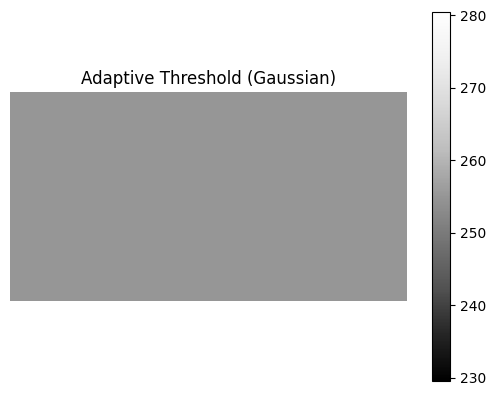

In [76]:
# Convert the grayscale image to 8-bit unsigned integer format; (necessary for opencv)
gray_8u = cv2.convertScaleAbs(grayN)

# Apply adaptive thresholding
# Using adaptive thresholding helps to account for variations in illumination across the image.
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C: threshold value is a weighted sum of neighborhood values where weights are a Gaussian window
# cv2.THRESH_BINARY: creates a binary image
# 101: block size - size of neighborhood area
# 15: C - constant subtracted from the mean or weighted mean
thresh_gauss = cv2.adaptiveThreshold(gray_8u, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 101, 15)


plt.imshow(thresh_gauss, cmap='Grays_r')
plt.title('Adaptive Threshold (Gaussian)')
plt.axis('off'); plt.colorbar()
plt.show()

**Gemini:**Next, I applied an adaptive Gaussian threshold to the grayscale image. This method is useful because it calculates the threshold for small regions of the image independently, which helps to handle uneven lighting or variations in background intensity. The result is a binary image where the crystals and some background noise are highlighted.

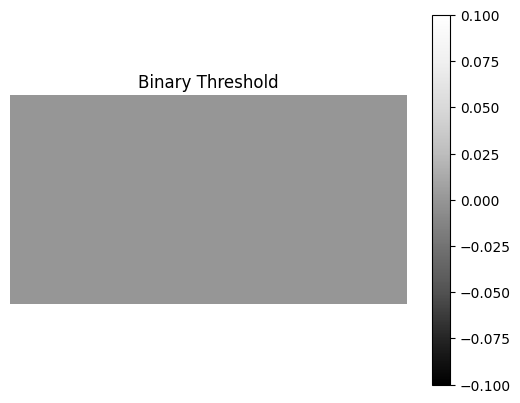

In [28]:
# Apply a binary threshold
# I will apply a binary threshold to the result of the adaptive thresholding to create a clearer binary image
# I chose a threshold of 10 to select the darker areas (which correspond to the crystals after adaptive thresholding)
bined = thresh_gauss < 10
plt.imshow(bined,cmap='Grays_r')
plt.title('Binary Threshold')
plt.axis('off')
plt.colorbar()
plt.show()

**Gemini:**Here, I applied a simple binary threshold to the output of the adaptive thresholding. By setting the threshold to 10, I am selecting the darker regions from the adaptively thresholded image, which correspond to the needle crystals. This step further refines the selection of the crystal areas.

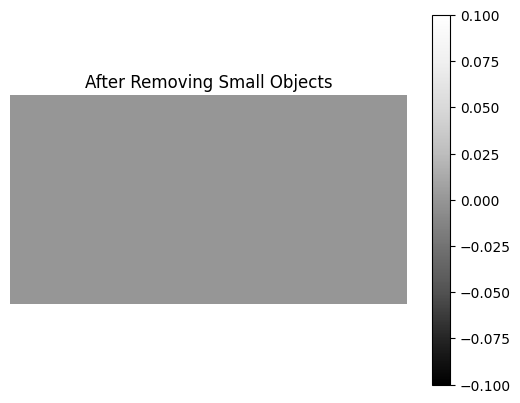

In [29]:
# Remove small objects
# There might be some small white areas in the background that are not crystals.
# I will use remove_small_objects to eliminate these based on size.
from skimage.morphology import remove_small_objects as rem_objects

removedSpots = rem_objects(bined,min_size=20)
plt.imshow(removedSpots,cmap='Grays_r')
plt.title('After Removing Small Objects')
plt.axis('off')
plt.colorbar()
plt.show()

**Gemini:**To clean up the image and remove small white specks that are not part of the crystals, I used the `remove_small_objects` function. I set `min_size` to 20, which means any connected component of white pixels smaller than 20 pixels will be removed. This helps to isolate the larger crystal structures.

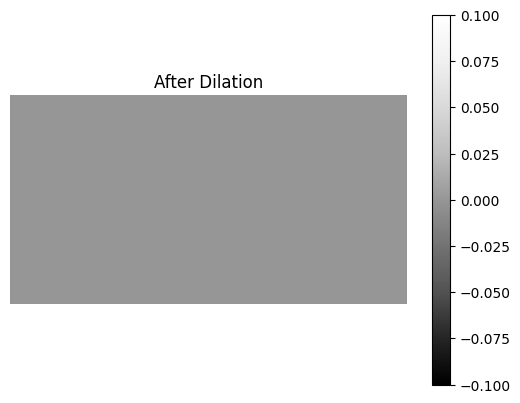

In [30]:
# Dilate the remaining objects
# Dilating the remaining white areas (the crystals) can help to connect broken parts and make them more solid.
from skimage.morphology import binary_dilation as dil
from skimage.morphology import disk

redilateN = dil(removedSpots,footprint=disk(1))
plt.imshow(redilateN,cmap='Grays_r')
plt.title('After Dilation')
plt.axis('off')
plt.colorbar()
plt.show()

**Gemini:**I applied binary dilation to the image. Using a disk structuring element of size 1, this operation expands the white regions by one pixel in all directions. This can help to close small gaps within the crystals and make their shapes more solid.

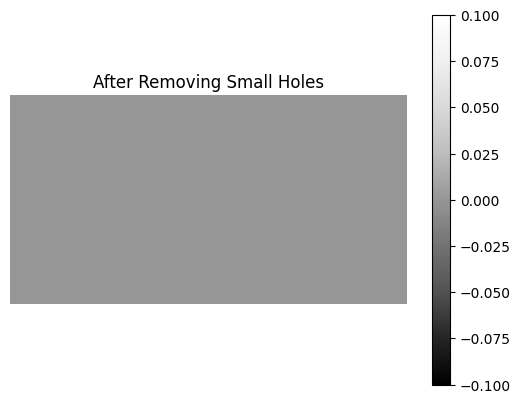

In [31]:
# Remove small holes within the objects
# There might be some small black holes within the white crystal regions.
# remove_small_holes can fill these holes.
from skimage.morphology import remove_small_holes as rem_holes

removed2N = rem_holes(redilateN,area_threshold=1000)
plt.imshow(removed2N, cmap='Grays_r')
plt.title('After Removing Small Holes')
plt.axis('off')
plt.colorbar()
plt.show()

**Gemini:**Next, I used `remove_small_holes` to fill in any small black regions (holes) that might be present within the white crystal areas. I set `area_threshold` to 1000, so any holes with an area less than 1000 pixels will be filled. This helps to create solid masks for the crystals.

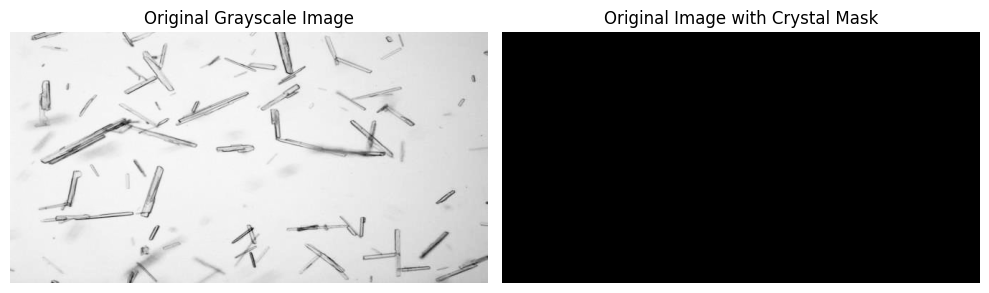

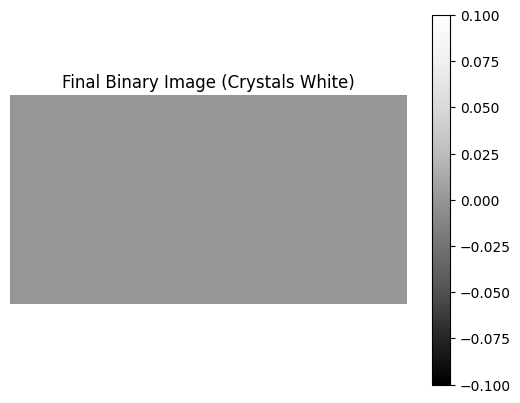

In [32]:
# Final check: Overlay the final binary mask on the original grayscale image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(grayN, cmap='Grays_r')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

# Use the cleaned_image as a mask to show only the crystals on the original image
# Multiply the original grayscale image by the binary mask.
# Since the mask is 0s and 1s, this will show the original pixel values where the mask is 1 (crystals)
# and black where the mask is 0 (background).
ax[1].imshow(grayN * removed2N, cmap='Grays_r')
ax[1].set_title('Original Image with Crystal Mask')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# The final binary image with crystals as white and background as black
final_binary_image = removed2N

plt.imshow(final_binary_image, cmap='Grays_r')
plt.title('Final Binary Image (Crystals White)')
plt.axis('off')
plt.colorbar()
plt.show()

**Gemini:** Finally, I conducted a final check by overlaying the resulting binary mask onto the original grayscale image. Multiplying the original grayscale image by the binary mask effectively highlights the areas identified as crystals while blacking out the background. The final binary image clearly shows the crystals in white and the background in black, fulfilling the requirement of the problem.

My Notes: I was not sure why the image was not working, I tired asking it again but i could not produce an image

## <font color='blue'>3. Come up with a procedure to quantify phase transitions in the liquid crystal RM257. At what temperature(s) do phase transitions occur at as this film is heated? Show your work.  (**30 points**)
<font color='blue'>Hint: Liquid crystals have different amounts of optical activity depending on their physical state.

<font color='blue'> For the data on this, you will need to go to the Canvas modules and download the folder "RM257.zip". You will then need to put in in your Google Drive and work with it from there. This is unpublished experimental data; I'm not sure if we will ever publish it, but I don't want it public on Github right now.

Once it is in your Google Drive, you can load it into a dataframe using the following code (you will need to modify the folder path into wherever you put it in your drive).

In [ ]:
import glob as glob
import re
folder = '/content/drive/MyDrive/Teaching Files/MatChar_F2025/Examples/HW6/RM257'
data = {}
temps = []
for f in glob.glob(f'{folder}/*'):
  if f[-10] == '/':
    temps.append(float(f[-9:-5]))
    data[float(f[-9:-5])] = ski.io.imread(f)
  elif f[-11] == '/':
    temps.append(float(f[-10:-5]))
    data[float(f[-10:-5])] = ski.io.imread(f)
temps.sort() # provides us a list of temperatures in ascending order (our dictionary is disorganized)

In [ ]:
plt.imshow(data[temps[3]])
plt.title((str(temps[3]) + ' C'))

In [ ]:
# to loop through every image in the dictionary in order, we could go:
for t in temps:
  print(f'Maximum pixel intensity at T = {t} C is {np.max(data[t])}')

We have basically constructed two things above: A dictionary of all of our images, which can be accessed by typing in data[xx.x], where xx.x is the temperature in degrees C, and a list of temperatures in order so that we can more conveniently go through things and possibly plot them.

In [ ]:
# please use a combination of code and text cells to answer this question

Please use a combination of code and text cells to answer this question

## 4. <font color='blue'> Determine the crystal growth rate in this system, showing your work. (**30 points**)  
<font color='blue'> For full credit, you can quantify the growth rate for a single crystal. For extra credit (5 points), find a way to report a standard deviation in the growth rate over all crystals in the sample. There are $0.2778~\mu m$ per pixel; each frame is $0.31746 s$ long.

https://pubs.acs.org/doi/10.1021/acs.nanolett.4c00620

Accessing the data

In [ ]:
! git clone https://github.com/cbishop4/MSE7530

In [ ]:
frame_nos = np.linspace(0,125,126,dtype=int)
images = np.empty((126, 1032, 1032))
for n in frame_nos:
  images[n] = ski.io.imread(f'/content/MSE7530/sampledata/HW6/CrystalVideo/frame{n}.jpg')[:,:,0]


In [ ]:
plt.imshow(images[60])

In [ ]:
# please use a combination of code and text cells

Please use a combination of code and text cells.

## <font color='blue'> 5. (No points, but **mandatory** if you used AI on anything other than question 2). AI reflection:  
<font color='blue'>What tasks was genAI most helpful for, and what were its limitations? You must write at least a paragraph.

Please use a text cell to answer this question.